In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

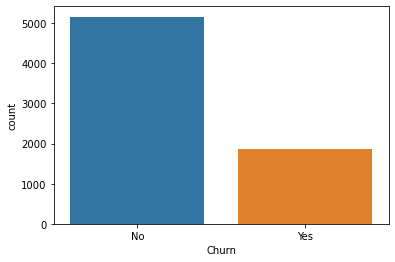

In [6]:
sns.countplot(data =df,x = 'Churn');

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

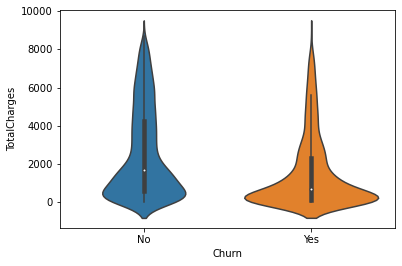

In [7]:
sns.violinplot(data =df,x = 'Churn',y = 'TotalCharges')

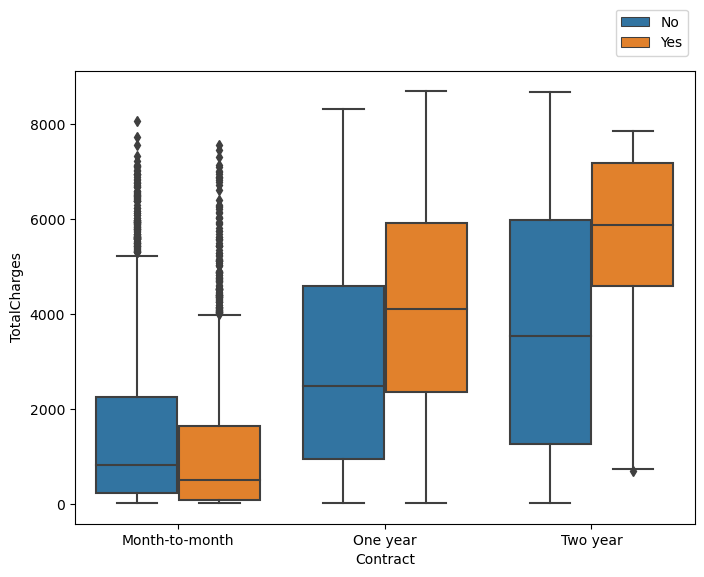

In [8]:
plt.figure(figsize = (8,6),dpi = 100)
sns.boxplot(data = df,y = 'TotalCharges',x = 'Contract',hue = 'Churn')
plt.legend(bbox_to_anchor = (1,1.15))

In [9]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents'
                             , 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [10]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

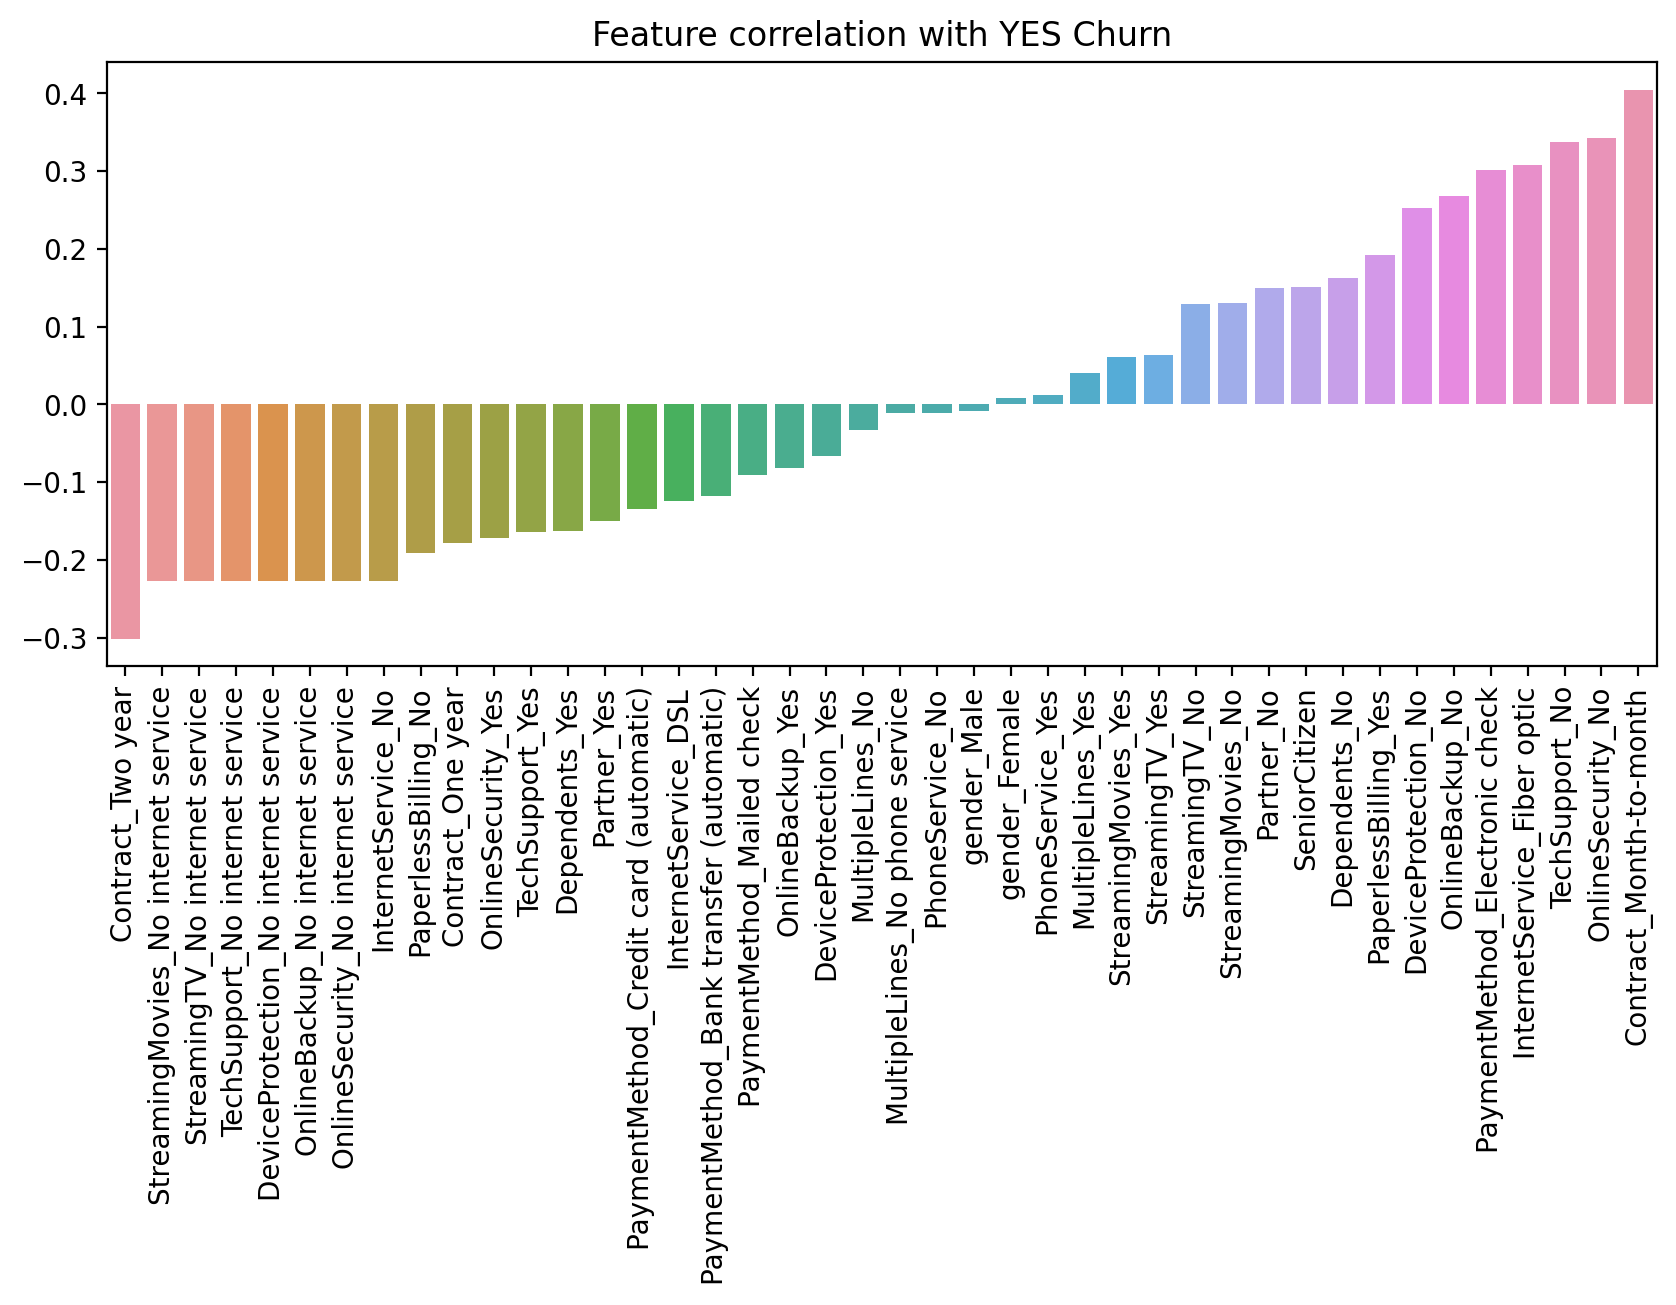

In [11]:
plt.figure(figsize = (10,4),dpi = 200)
plt.title('Feature correlation with YES Churn')
sns.barplot(x = corr_yes_churn.index,y = corr_yes_churn.values)
plt.xticks(rotation = 90);

In [12]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

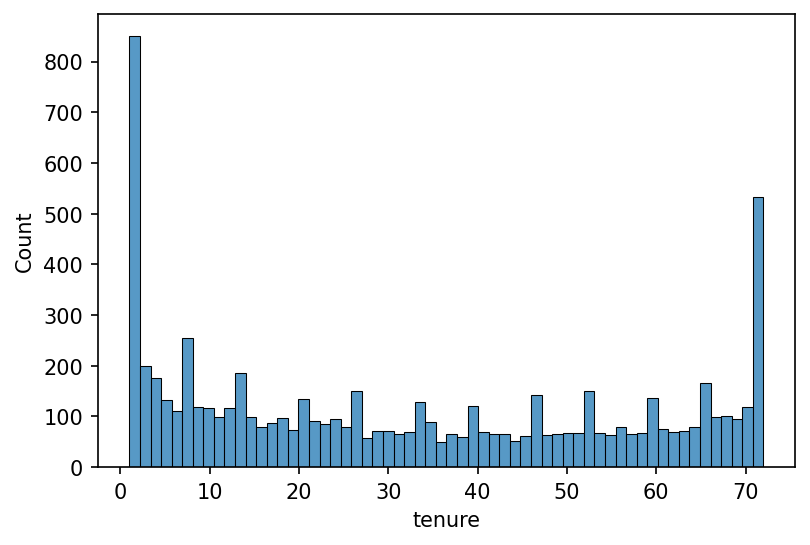

In [14]:
plt.figure(figsize = (6,4),dpi = 150)
sns.histplot(data =df,x ='tenure',bins = 60)

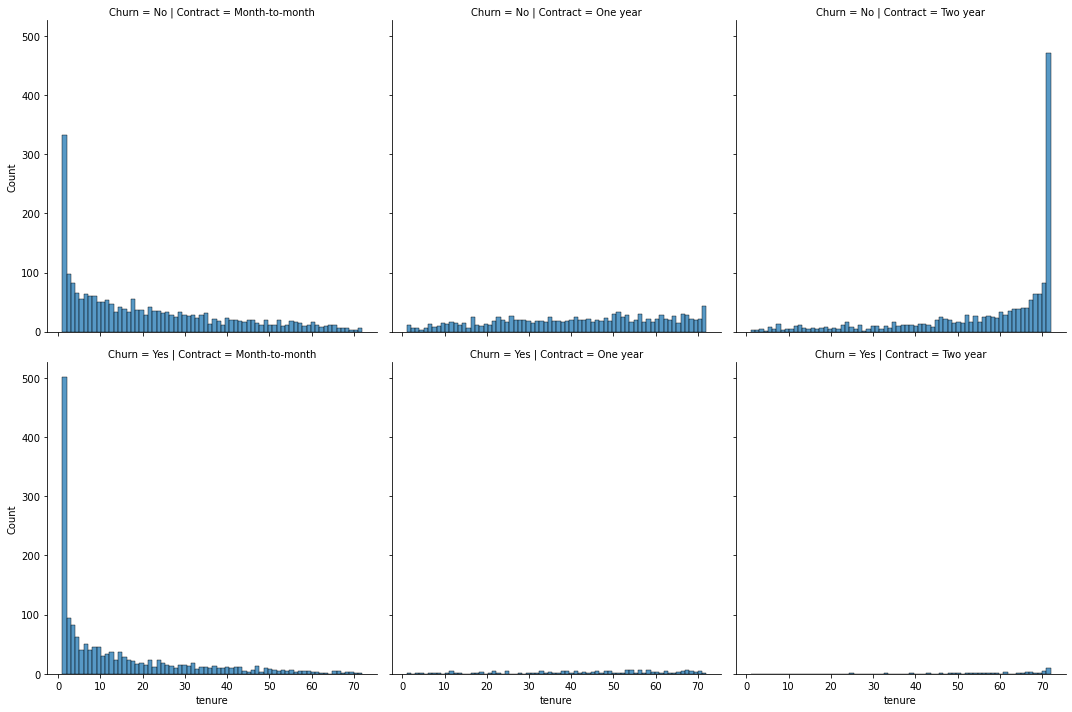

In [15]:
sns.displot(data =df,x = 'tenure',bins = 70,col = 'Contract',row = 'Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

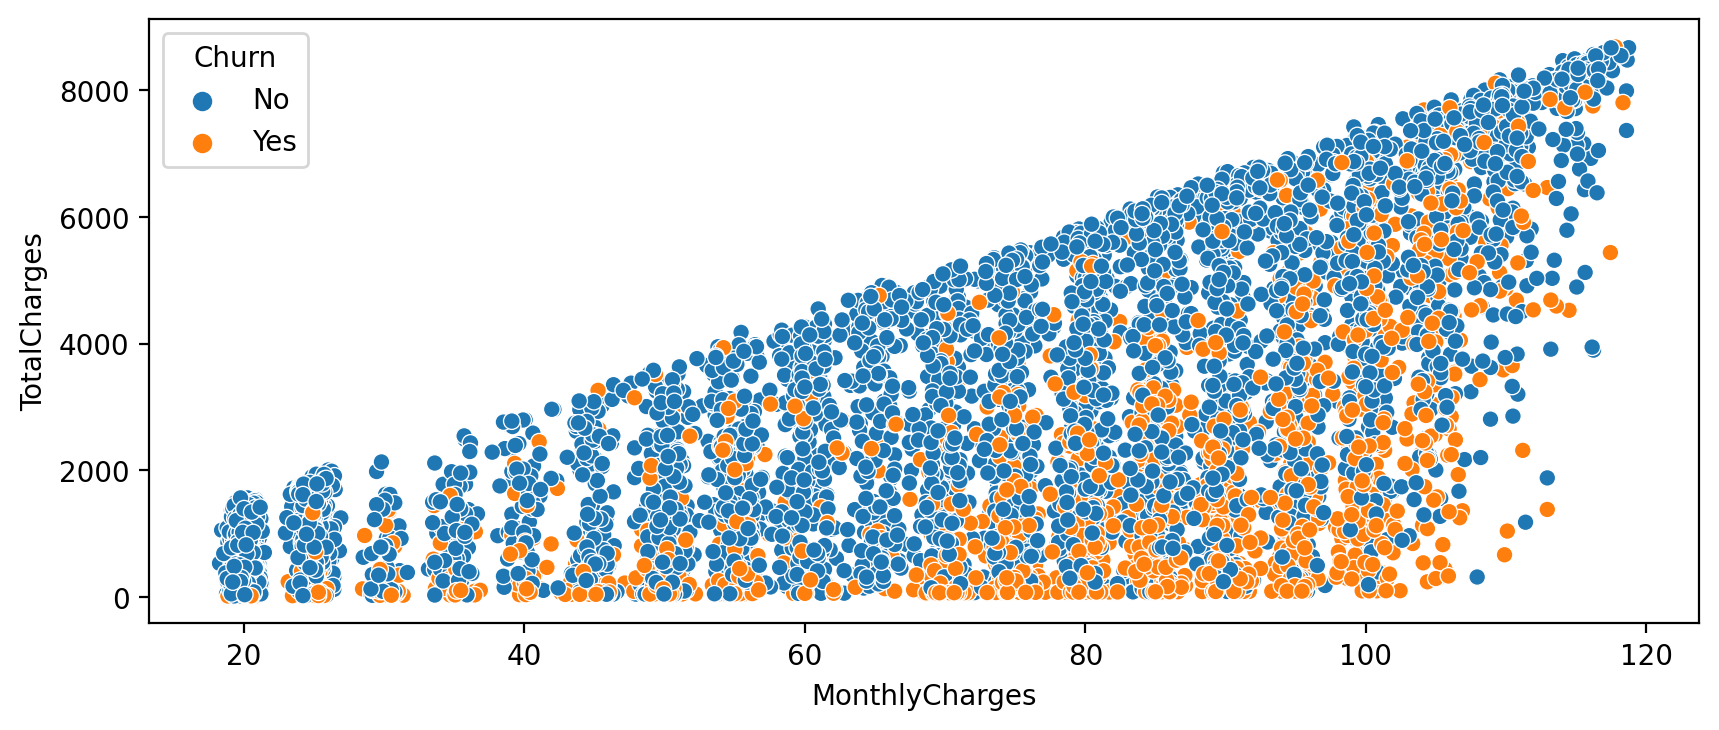

In [17]:
plt.figure(figsize = (10,4),dpi =200)
sns.scatterplot(data = df,x ='MonthlyCharges',y = 'TotalCharges',hue = 'Churn')

In [24]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [25]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [27]:
churn_rate = 100*yes_churn/(yes_churn+no_churn)

In [29]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

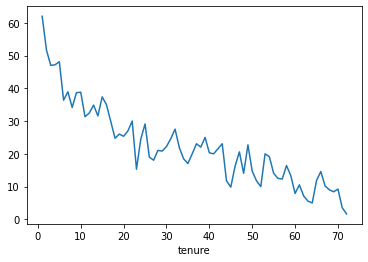

In [30]:
churn_rate.transpose()['customerID'].plot()

In [31]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [33]:
df['Tenure Cohort']=df['tenure'].apply(cohort)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

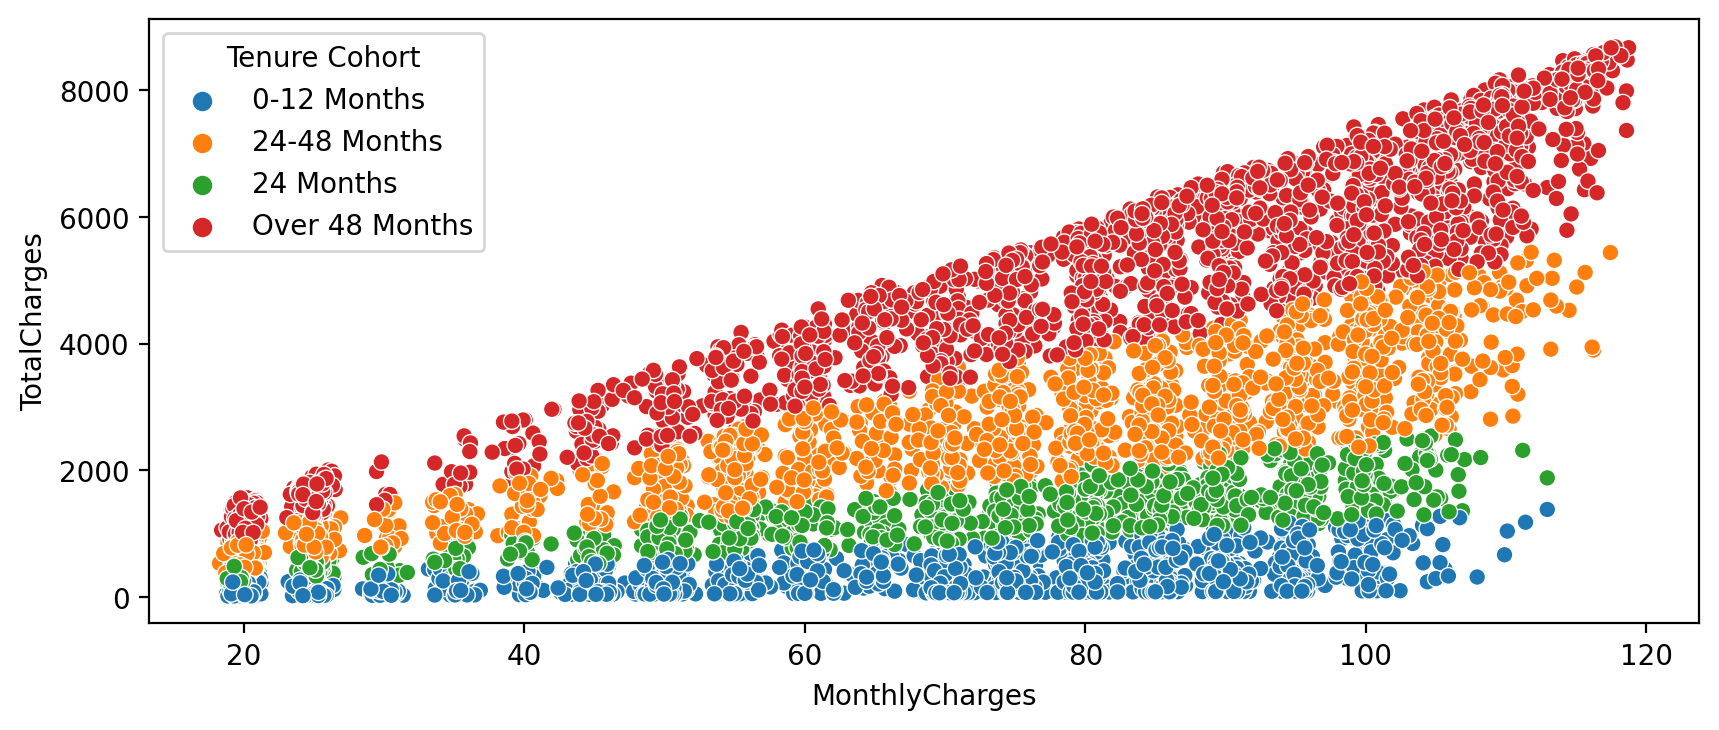

In [34]:
plt.figure(figsize = (10,4),dpi =200)
sns.scatterplot(data = df,x ='MonthlyCharges',y = 'TotalCharges',hue = 'Tenure Cohort')

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

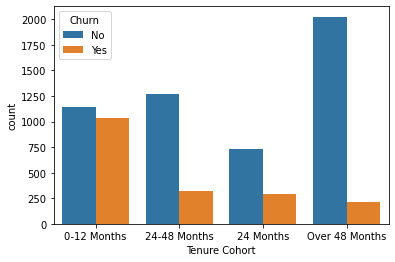

In [35]:
sns.countplot(data = df,x = 'Tenure Cohort',hue = 'Churn')

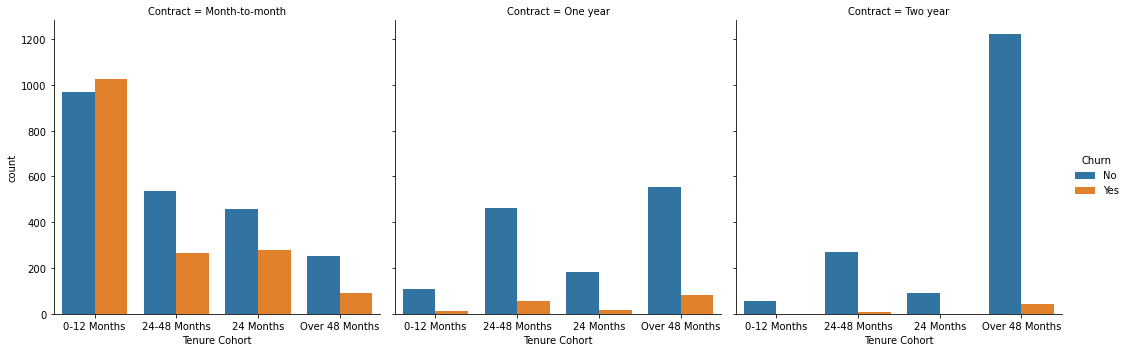

In [36]:
sns.catplot(data = df,x = 'Tenure Cohort',hue = 'Churn',kind = 'count',col = 'Contract')

In [38]:
## Single Decision Tree
X = df.drop(['Churn','customerID'],axis = 1)

In [39]:
X = pd.get_dummies(X,drop_first = True)

In [40]:
y = df['Churn']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier(max_depth=6)

In [45]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [46]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [47]:
predict = dt.predict(X_test)

In [48]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



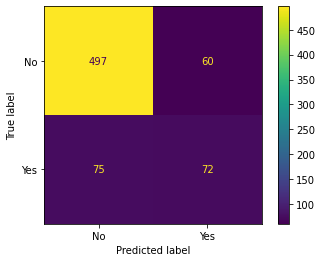

In [49]:
plot_confusion_matrix(dt,X_test,y_test)

In [51]:
imp_feat = pd.DataFrame(data = dt.feature_importances_,index = X.columns,columns = ['Feat_impt'])

In [53]:
imp_feats = imp_feat.sort_values('Feat_impt')

In [54]:
imp_feats = imp_feats[imp_feats['Feat_impt'] > 0]

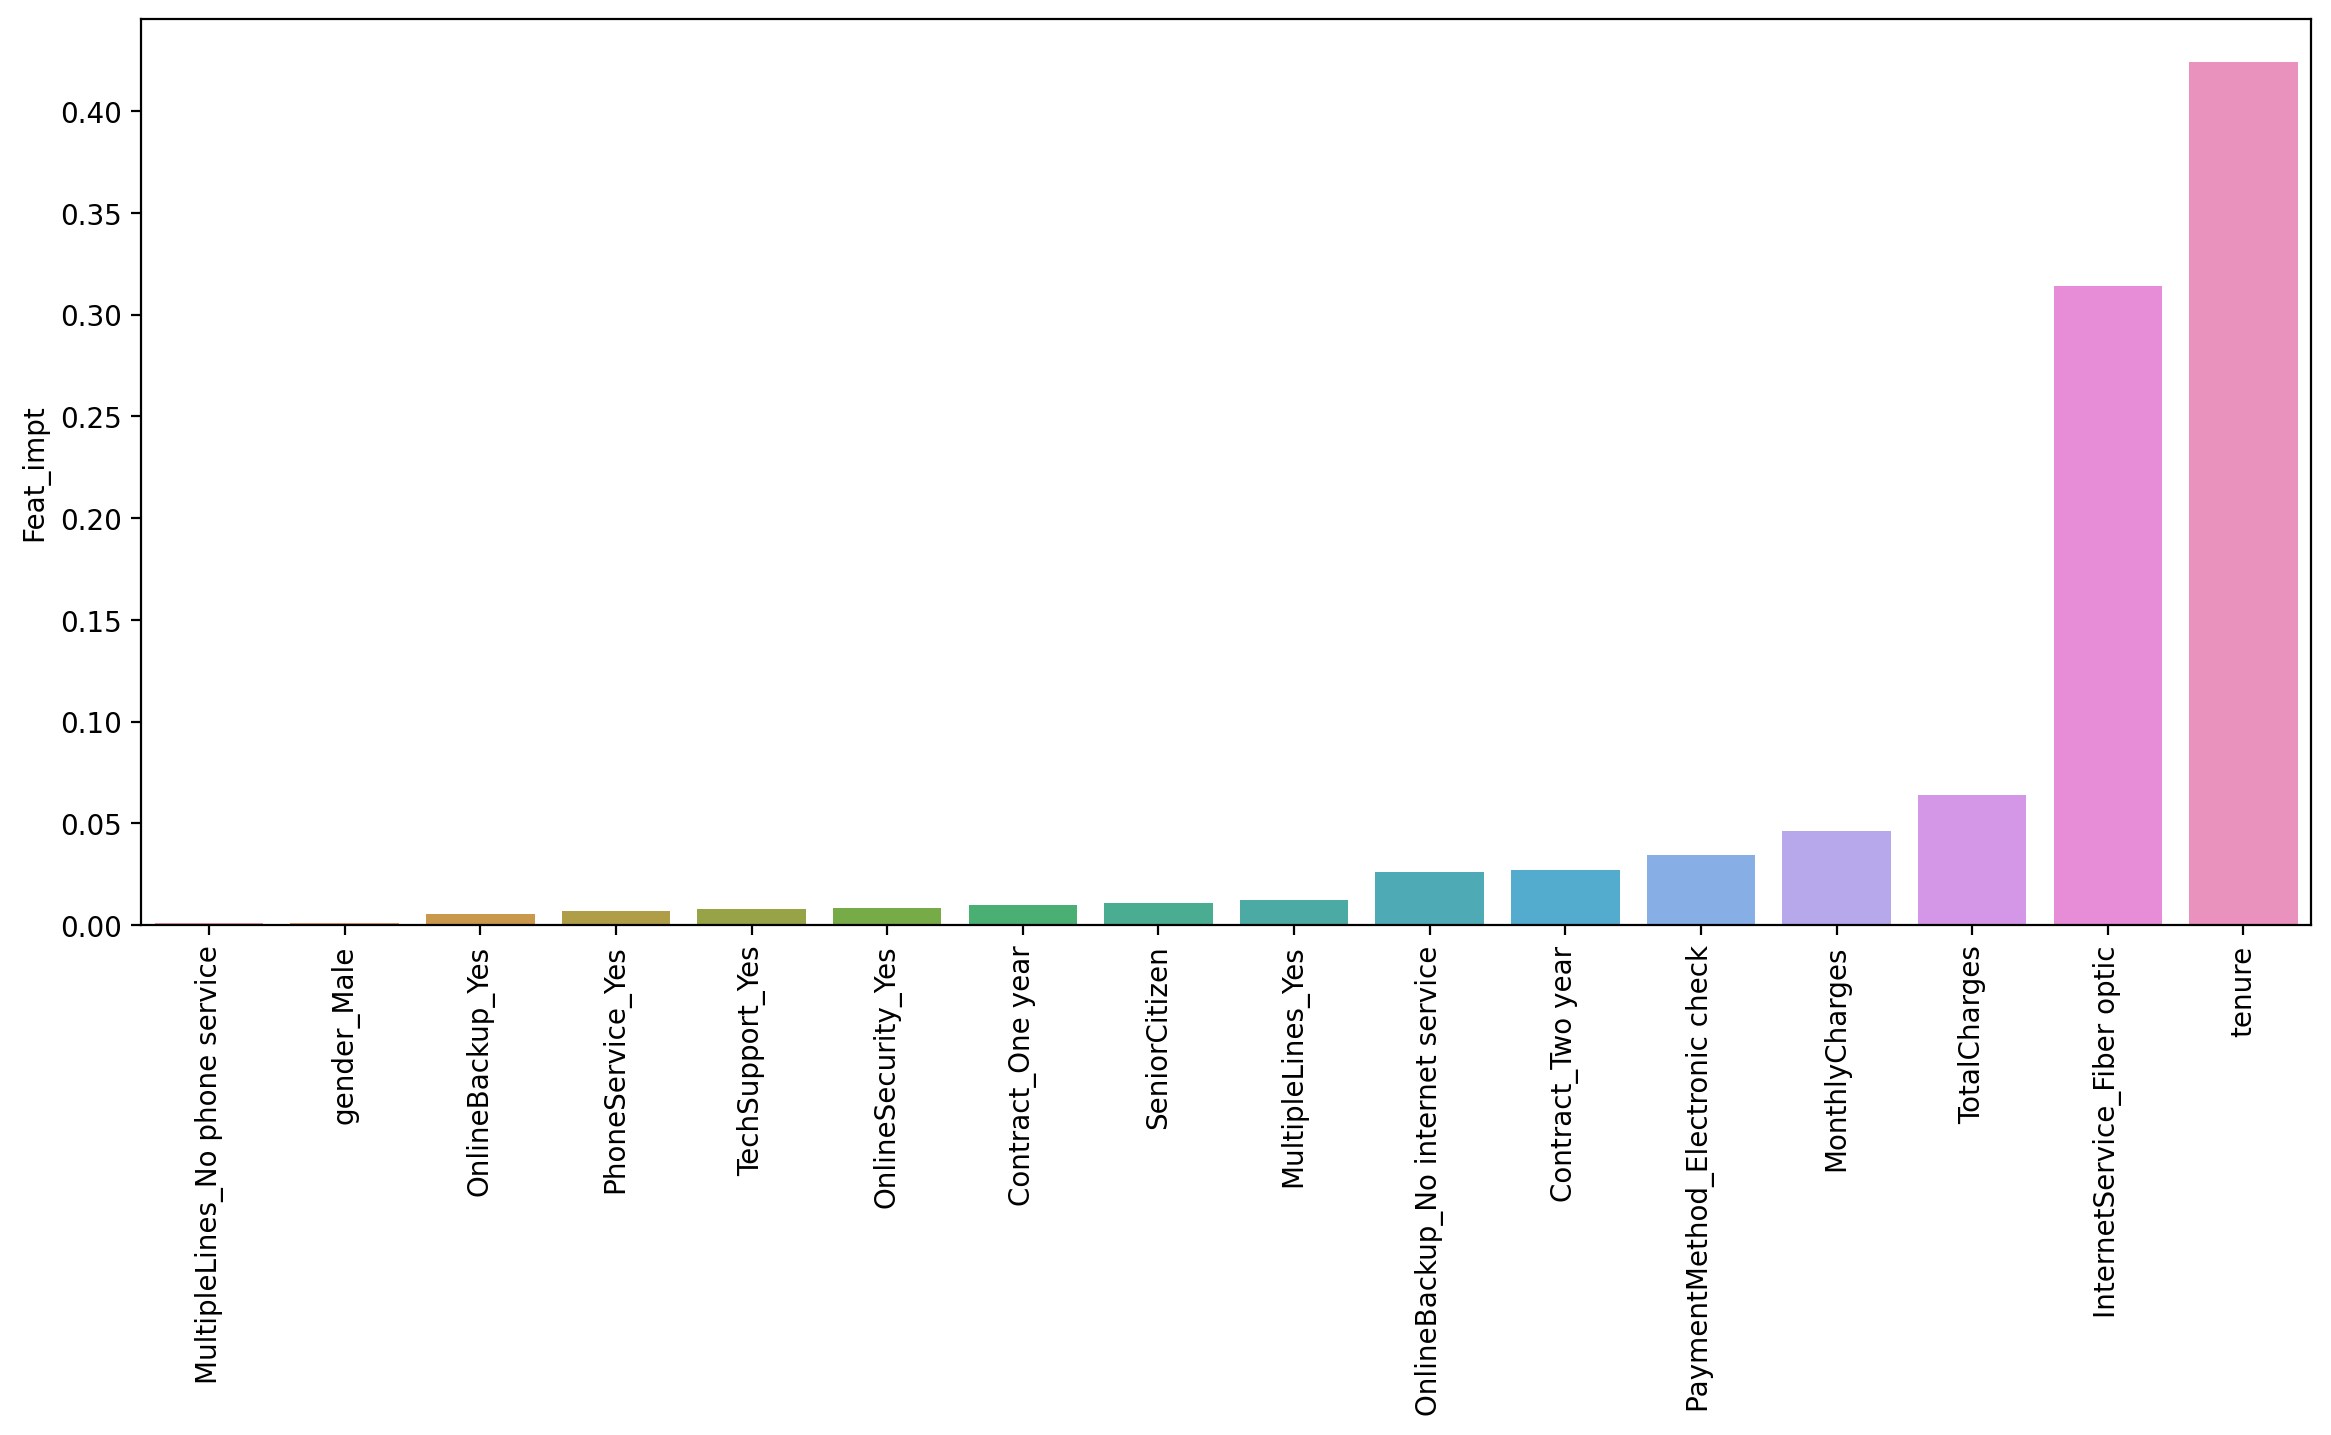

In [61]:
plt.figure(figsize = (14,6),dpi = 200)
sns.barplot(data =imp_feats,x =imp_feats.index,y = 'Feat_impt')
plt.xticks(rotation = 90);

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier(max_depth = 6)

In [70]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [71]:
preds = rf.predict(X_test)

In [72]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.61      0.45      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.81       704



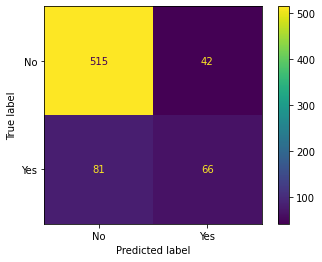

In [73]:
plot_confusion_matrix(rf,X_test,y_test)

In [74]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [86]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [87]:
gb_model = GradientBoostingClassifier()

In [88]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [89]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [90]:
ada_preds = ada_model.predict(X_test)

In [91]:
gb_preds = gb_model.predict(X_test)

In [92]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [93]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



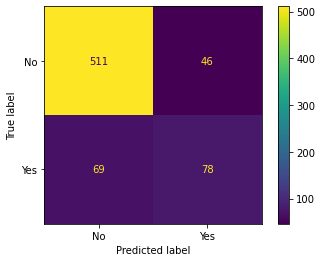

In [94]:
plot_confusion_matrix(ada_model,X_test,y_test)

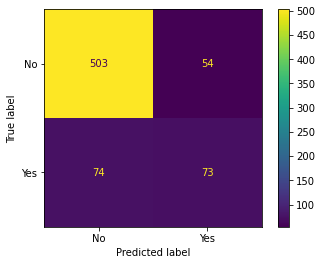

In [95]:
plot_confusion_matrix(gb_model,X_test,y_test)